In [2]:
import wbdata
import pandas as pd
import datetime

# País: Argentina (código: ARG)
country = ["ARG"]

# Indicadores económicos y sociales (verificados)
indicators = {
    'NY.GDP.MKTP.CD': 'PIB',                # PIB
    'SI.POV.NAHC': 'Pobreza',               # Tasa de pobreza nacional
    'SP.POP.TOTL': 'Poblacion',             # Población total
    'GC.XPN.TOTL.GD.ZS': 'Gasto_publico',  # Gasto público
    'FP.CPI.TOTL.ZG': 'Inflacion',          # Inflación
    'NE.EXP.GNFS.CD': 'Exportaciones',      # Exportaciones
    'NE.IMP.GNFS.CD': 'Importaciones',      # Importaciones
    'BX.KLT.DINV.WD.GD.ZS': 'IED',         # Inversión extranjera directa
    'SP.DYN.LE00.IN': 'Esperanza_vida',     # Esperanza de vida
    'SE.XPD.TOTL.GD.ZS': 'Gasto_educacion', # Gasto en educación
    'DT.DOD.DECT.CD': 'Deuda_externa',      # Deuda externa total
    'IT.NET.USER.ZS': 'Acceso_internet',    # Usuarios de internet
    'SL.UEM.TOTL.ZS': 'Tasa_desempleo',     # Desempleo
    'SH.XPD.CHEX.GD.ZS': 'Gasto_salud',     # Gasto en salud
    'NY.GNS.ICTR.ZS': 'Tasa_ahorro',        # Tasa de ahorro bruto
    'SE.TER.ENRR': 'Educacion_terciaria'    # Tasa de matriculación terciaria
}

# Establecer el rango de fechas
start_date = datetime.datetime(2000, 1, 1)
end_date = datetime.datetime(2020, 12, 31)

# Obtener los datos
df = wbdata.get_dataframe(indicators, country=country, date=(start_date, end_date))

# Mostrar los primeros registros
print(df.head())

# Guardar los datos en un archivo CSV
df.to_csv("PIB_Argentina_WB.csv")
print("Datos guardados en 'PIB_Argentina_WB.csv'")

/Users/adrianacasenave/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


               PIB  Pobreza   Poblacion  Gasto_publico Inflacion  \
date                                                               
2020  3.857405e+11     42.0  45191965.0      25.840531      None   
2019  4.477547e+11     35.5  44973465.0      22.036481      None   
2018  5.248199e+11     32.0  44654882.0      22.687781      None   
2017  6.436284e+11     25.7  44288894.0      24.282532      None   
2016  5.575323e+11     30.3  43900313.0      26.179916      None   

      Exportaciones  Importaciones       IED  Esperanza_vida  Gasto_educacion  \
date                                                                            
2020   6.405381e+10   5.245409e+10  1.266169          75.892          5.27690   
2019   8.025948e+10   6.584562e+10  1.485007          77.284          4.77165   
2018   7.576660e+10   8.568131e+10  2.232532          76.999          4.87774   
2017   7.286056e+10   8.991050e+10  1.789365          76.833          5.45432   
2016   6.984260e+10   7.563925e+10  0

Limpieza y transformación de los datos

In [3]:
# Verificar las columnas del DataFrame
print(df.columns)

Index(['PIB', 'Pobreza', 'Poblacion', 'Gasto_publico', 'Inflacion',
       'Exportaciones', 'Importaciones', 'IED', 'Esperanza_vida',
       'Gasto_educacion', 'Deuda_externa', 'Acceso_internet', 'Tasa_desempleo',
       'Gasto_salud', 'Tasa_ahorro', 'Educacion_terciaria'],
      dtype='object')


In [4]:
# Eliminar filas con valores nulos
df_clean = df.dropna()

# Reemplazar valores nulos por la media (si es apropiado)
df['PIB'] = df['PIB'].fillna(df['PIB'].mean())

# Eliminar duplicados
df_clean = df_clean.drop_duplicates()

# Verificar los primeros registros después de la limpieza
print(df.head())

               PIB  Pobreza   Poblacion  Gasto_publico Inflacion  \
date                                                               
2020  3.857405e+11     42.0  45191965.0      25.840531      None   
2019  4.477547e+11     35.5  44973465.0      22.036481      None   
2018  5.248199e+11     32.0  44654882.0      22.687781      None   
2017  6.436284e+11     25.7  44288894.0      24.282532      None   
2016  5.575323e+11     30.3  43900313.0      26.179916      None   

      Exportaciones  Importaciones       IED  Esperanza_vida  Gasto_educacion  \
date                                                                            
2020   6.405381e+10   5.245409e+10  1.266169          75.892          5.27690   
2019   8.025948e+10   6.584562e+10  1.485007          77.284          4.77165   
2018   7.576660e+10   8.568131e+10  2.232532          76.999          4.87774   
2017   7.286056e+10   8.991050e+10  1.789365          76.833          5.45432   
2016   6.984260e+10   7.563925e+10  0

Análisis exploratorio de datos (EDA)

In [5]:
# Descripción estadística
print(df.describe())

                PIB   Pobreza     Poblacion  Gasto_publico  Exportaciones  \
count  2.100000e+01   5.00000  2.100000e+01      12.000000   2.100000e+01   
mean   3.851698e+11  33.10000  4.131034e+07      21.735123   6.294620e+10   
std    1.661626e+11   6.09877  2.559117e+06       3.577940   2.078447e+10   
min    9.772400e+10  25.70000  3.721398e+07      16.832888   2.773661e+10   
25%    2.686968e+11  30.30000  3.921679e+07      19.005966   4.619818e+10   
50%    3.857405e+11  32.00000  4.128869e+07      22.362131   6.516232e+10   
75%    5.301581e+11  35.50000  4.347701e+07      24.679434   7.976296e+10   
max    6.436284e+11  42.00000  4.519196e+07      26.179916   9.780998e+10   

       Importaciones        IED  Esperanza_vida  Gasto_educacion  \
count   2.100000e+01  21.000000       21.000000        21.000000   
mean    5.674249e+10   1.964374       75.725905         4.830270   
std     2.409745e+10   0.769436        1.021694         0.686715   
min     1.306582e+10   0.584749   

In [6]:
# Mostrar las primeras filas del dataframe
print(df.head())

# Verificar tipos de datos
print(df.dtypes)

# Comprobar valores nulos
print(df.isnull().sum())

# Verificar la cantidad de filas y columnas
print(f"Shape del DataFrame: {df.shape}")

# Información general del DataFrame
print(df.info())

               PIB  Pobreza   Poblacion  Gasto_publico Inflacion  \
date                                                               
2020  3.857405e+11     42.0  45191965.0      25.840531      None   
2019  4.477547e+11     35.5  44973465.0      22.036481      None   
2018  5.248199e+11     32.0  44654882.0      22.687781      None   
2017  6.436284e+11     25.7  44288894.0      24.282532      None   
2016  5.575323e+11     30.3  43900313.0      26.179916      None   

      Exportaciones  Importaciones       IED  Esperanza_vida  Gasto_educacion  \
date                                                                            
2020   6.405381e+10   5.245409e+10  1.266169          75.892          5.27690   
2019   8.025948e+10   6.584562e+10  1.485007          77.284          4.77165   
2018   7.576660e+10   8.568131e+10  2.232532          76.999          4.87774   
2017   7.286056e+10   8.991050e+10  1.789365          76.833          5.45432   
2016   6.984260e+10   7.563925e+10  0

Visualización de distribuciones

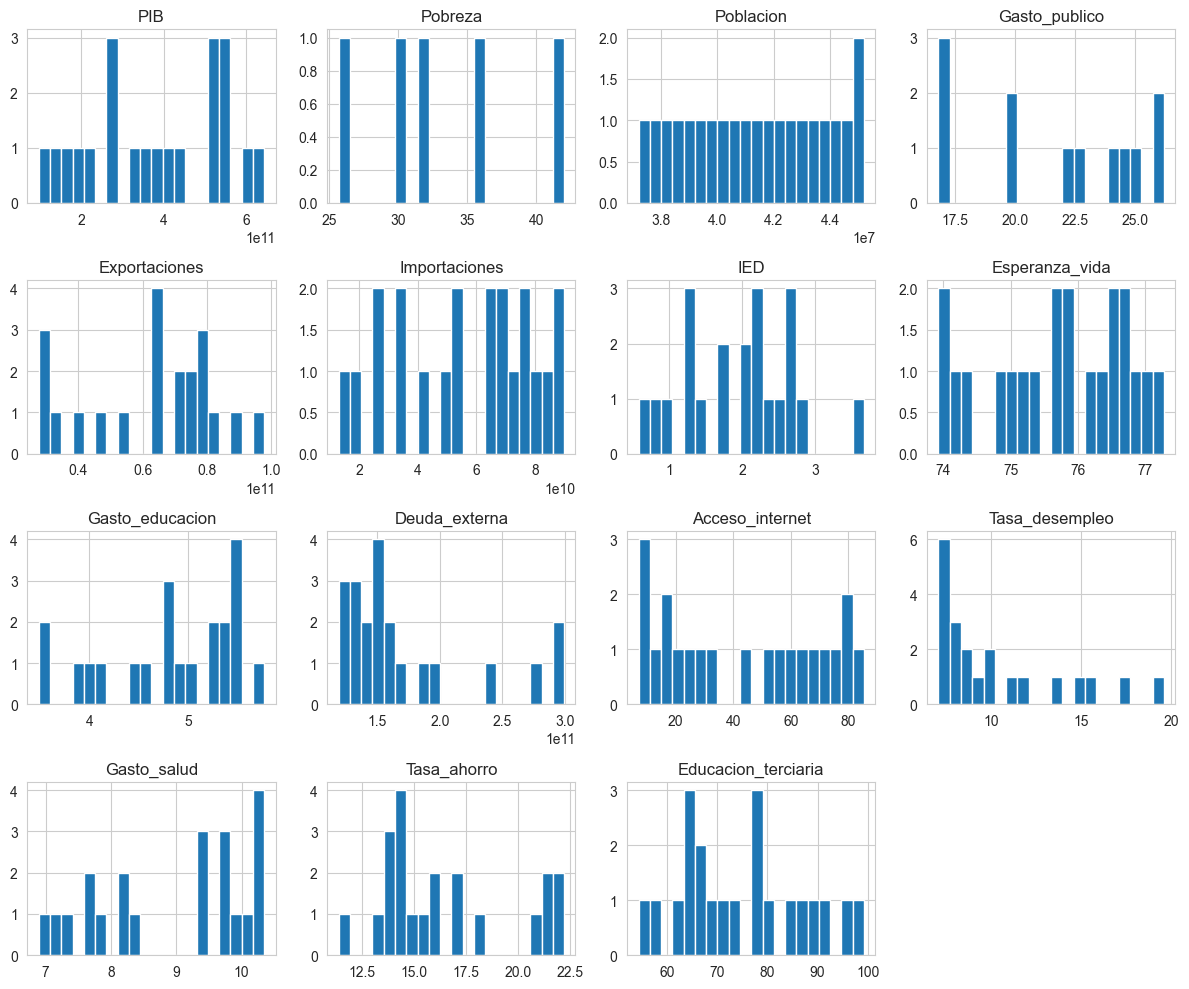

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histograma de todas las columnas numéricas
df.hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración básica de seaborn
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 10)

# 1. Histogramas de todas las columnas numéricas
df.hist(bins=20)
plt.suptitle('Distribución de Variables Económicas', y=1.02)
plt.tight_layout()
plt.show()

# 2. Gráfico de línea para el PIB a lo largo del tiempo
plt.figure()
sns.lineplot(data=df, x=df.index, y='PIB')
plt.title('Evolución del PIB de Argentina')
plt.xticks(rotation=45)
plt.show()

# 3. Heatmap de correlaciones
plt.figure()
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación de Variables')
plt.show()

# 4. Boxplots de variables principales
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.boxplot(y=df['PIB'], ax=axes[0,0])
axes[0,0].set_title('PIB')
sns.boxplot(y=df['Inflacion'], ax=axes[0,1])
axes[0,1].set_title('Inflación')
sns.boxplot(y=df['Tasa_desempleo'], ax=axes[1,0])
axes[1,0].set_title('Desempleo')
sns.boxplot(y=df['Gasto_publico'], ax=axes[1,1])
axes[1,1].set_title('Gasto Público')
plt.tight_layout()
plt.show()

NameError: name 'df' is not defined